In [1]:
#IMPORTING LIBRARIES-SET UP
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt #for plots
import seaborn as sns # for plots
import tensorflow as tf # our main library, deep learning modellign
from tensorflow import keras # keras library
from tensorflow.keras import layers # for creating layers


#DATASET READING AND FILTERING
data = pd.read_csv("spam.csv", encoding="latin-1") # reading data
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data = data.rename(columns={'v1':'label', 'v2':'Text'})
data['label_in_num'] = data['label'].map({'ham':0,'spam':1})
data.head() #shows the preview of the dataset

,label,Text,label_in_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### To do: develop an accurate simple neural network model for spam classification (no LSTM, CNN, etc.)

Text(0.5, 0, 'Text length')

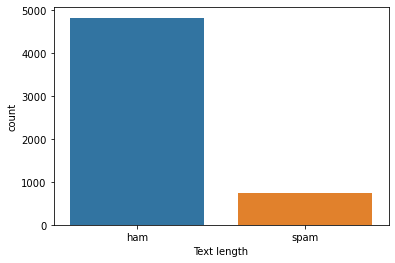

In [2]:
###Plotting Diagrams
sns.countplot(x=data['label']) # countplot for label
data['label'].value_counts()



plt.xlabel('Text length')

<AxesSubplot:ylabel='count'>

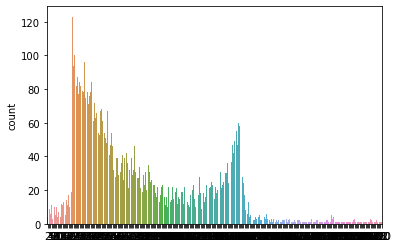

In [3]:
#showing the intensity of the data
sns.countplot(x=[len(data.loc[i]['Text']) for i in range(len(data))])

In [4]:
#CHECKING THE WORDS PER SENTENCE/DISTRIBUTION
text_words_lengths = [len(data.loc[i]['Text'].split()) for i in range(0, len(data))]
total_length = np.sum(text_words_lengths)
text_words_mean = int(np.mean(text_words_lengths))
print('we have ' + str(total_length) + ' words in our Dataframe')
print('the average word count in every scentence is ' + str(text_words_mean))
text_words_lengths[:5], total_length, text_words_mean

we have 86335 words in our Dataframe
the average word count in every scentence is 15


([20, 6, 28, 11, 13], 86335, 15)

In [5]:
##SETTING UP THE DATA FOR TRAINING

from sklearn.model_selection import train_test_split

X, y = np.asanyarray(data['Text']), np.asanyarray(data['label_in_num'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
len(X_train), len(X_test), X_train[:2], y_train[:2]

(4457,
 1115,
 array(['Kallis wont bat in 2nd innings.',
        'Ringtone Club: Get the UK singles chart on your mobile each week and choose any top quality ringtone! This message is free of charge.'],
       dtype=object),
 array([0, 1], dtype=int64))

In [6]:
#PREPARING THE DATA
MAXTOKENS = total_length
OUTPUTLEN = text_words_mean

text_vec = layers.TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)

text_vec.adapt(X_train)

embedding_layer = layers.Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN
)

# Input layer
input_layer = layers.Input(shape=(1,), dtype=tf.string)
# Text Vectorizatino layer
vec_layer = text_vec(input_layer)
# Embedding layer
embedding_layer_model = embedding_layer(vec_layer)
# Global Average Pooling layer
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
# Flatten layer for Dense layers
x = layers.Flatten()(x)
# 32 units dense layer
x = layers.Dense(32, activation='relu')(x)
# output layer with sigmoid activation function
output_layer = layers.Dense(1, activation='sigmoid')(x)
# final model
model = keras.Model(input_layer, output_layer)

In [7]:
#COMPILING
model.compile(optimizer=keras.optimizers.Adam(),
               loss=keras.losses.BinaryCrossentropy(label_smoothing=0.5),
               metrics=['accuracy'])

In [8]:
#TRAINING
history = model.fit(X_train,
           y_train,
           epochs=40,
           batch_size=510,
           validation_data=(X_test, y_test),
           validation_steps=int(0.2 * len(X_test)))

Epoch 1/40
9/9 [==============================] - 6s 474ms/step - loss: 0.6820 - accuracy: 0.8517 - val_loss: 0.6684 - val_accuracy: 0.8744
Epoch 2/40
9/9 [==============================] - 1s 150ms/step - loss: 0.6561 - accuracy: 0.8739
Epoch 3/40
9/9 [==============================] - 1s 138ms/step - loss: 0.6270 - accuracy: 0.8869
Epoch 4/40
9/9 [==============================] - 1s 138ms/step - loss: 0.6021 - accuracy: 0.9087
Epoch 5/40
9/9 [==============================] - 1s 140ms/step - loss: 0.5882 - accuracy: 0.9365
Epoch 6/40
9/9 [==============================] - 1s 148ms/step - loss: 0.5818 - accuracy: 0.9628
Epoch 7/40
9/9 [==============================] - 1s 142ms/step - loss: 0.5761 - accuracy: 0.9800
Epoch 8/40
9/9 [==============================] - 1s 144ms/step - loss: 0.5720 - accuracy: 0.9841
Epoch 9/40
9/9 [==============================] - 1s 141ms/step - loss: 0.5697 - accuracy: 0.9868
Epoch 10/40
9/9 [==============================] - 1s 151ms/step - loss: 0.5

In [9]:
#TESTING OF FINAL ACCURACY AND LOSS 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Loss {:.4f}".format(loss))

Testing Accuracy 0.9839
Testing Loss 0.5714


In [10]:
data.to_csv("malbas_spam_output.csv")